In [1]:
from dotenv import load_dotenv
import os

load_dotenv()  # load variables from .env file
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Load tables & images

In [2]:
import pandas as pd
from pathlib import Path

DATA_PATH = '../competitors-xgb/data'
file_path = (
    Path(DATA_PATH) / 'tables_OZ_geo_5500' /
    'processed' / 'OZ_geo_5500.csv'
)
full_df = pd.read_csv(file_path) 
full_df.shape

(5562, 6)

In [3]:
import pandas as pd
from pathlib import Path

DATA_PATH = '../competitors-xgb/data'
IMAGES_DIR = (
    Path(DATA_PATH) / 'images_OZ_geo_5500'
)

In [4]:
pd.set_option('display.max_colwidth', None)
sample = full_df.sample(1)
display(sample[['sku']])
display(sample[['name']])
display(sample[['description']])

sku
4444  679285909

name
4444  настенная карта Саратовской области 129х175 см, (на самоклеющейся пленке)

description
4444  <ul><li>все населенные пункты</li><li>автомобильные дороги</li><li>железные дороги и станции</li><li>границы муниципальных районов и поселений</li><li>лесные, водные объекты</li><li>особо охраняемые природные территории и др.</li><li>список населенных пунктов с привязкой по квадратам</li></ul>Карта отображает административно-территориальное устройство Саратовской области. У населенных пунктов с населением свыше 1 тыс. человек подписано количество жителей (округлено до тысяч). Масштаб 1 : 350 000 (1 см = 3,5 м). Карта отпечатана на самоклеющейся плёнке и при необходимости её можно наклеить на твердую основу (пластик, металл, дерево).

In [5]:
# Fill NaN for descriptions
full_df.description = full_df.description.fillna('')
full_df.name.isna().sum(), full_df.description.isna().sum()

(np.int64(0), np.int64(0))

In [6]:
full_df['name_and_description'] = full_df['name'] + '.\n' + full_df['description']
full_df[['name_and_description']].head(1)

name_and_description
0  Карты МИРА и РОССИИ настенные политические,160х102 см, Комплект школьных карт для детей / 2024 г.\nПредставляем вашему вниманию уникальный набор карт, состоящий из Географической карты России и Настенной карты мира. Каждая карта имеет размер 102х160 см и масштаб 1:5 500 000 для России и 1:22 000 000 для мира. Эти современные издания 2024 года отражают актуальные изменения с новыми границами и помогут вам в образовательных целях, декоре и повседневной жизни.\nГеографическая карта России — идеальный помощник для школьников и любителей географии. Она прекрасно иллюстрирует все регионы страны, их особенности и природные зоны. Настенная карта России характеризуется четкой и детализированной графикой, что делает её удобной для изучения. Эта физическая карта позволяет лучше понять разнообразие природных зон России и узнать о местной флоре и фауне. Яркие цвета и четкие обозначения обеспечивают высокую читаемость, что позволяет легко находить нужные области и изучать их.\nНастенная карта мира станет отличным выбором для образовательных целей и домашнего использования. Она помогает изучать страны, их границы и столицы, развивая пространственное мышление. Политическая карта мира выполнена в ярких цветах и с четкими границами, включая моря, океаны и флаги стран. Она подойдет как для школьных кабинетов, так и для стильного оформления интерьера вашего дома.\nОбъединяя два товара, совместите полезное с эстетическим — карты можно использовать как современные учебные пособия для школьников и взрослых, а также как элементы декора. Этот набор станет прекрасным подарком на 1 сентября, Новый год и другие праздники. Ламинированная поверхность защищает карты от повреждений, делая их долговечными и удобными для использования.\nВыбирая набор карт, вы обеспечиваете полезный и функциональный инструмент для изучения нашей страны и мира, что делает их незаменимыми в учебном процессе и повседневной жизни.

In [7]:
# Посмотрим на различные типы карт у целевого продавца
full_df[full_df['seller'] == 'ИНТЕРТРЕЙД'][['name']]

name
0                            Карты МИРА и РОССИИ настенные политические,160х102 см, Комплект школьных карт для детей / 2024 г
1                                       Схема линий скоростного транспорта Москвы (Метро, МЦК, МЦД) 0,5*0,7 м, ламинированная
2                                             Политическая карта МИРА 160х109 см, Карта мира настенная, подарок для школьника
3                  Политическая карта МИРА настенная, 100х70см, школьная географическая карта мира, Выпуск 2024 год, В ТУБУСЕ
4                            Политическая карта МИРА настенная, 160х102см, карта мира по географии, Выпуск 2024 год, В ТУБУСЕ
5                                    Карта России настенная, 102х160 см, карта России по географии, Выпуск 2024 год, В ТУБУСЕ
6                                              Карта России настенная политическая, в тубусе 100х70см, Карта России настенная
7                                                 Политическая карта МИРА настенная, 100х70см, новые границы, выпуск 2024 год
5241                                                   Настенная карта Москвы 2024, Карта Москвы, с линиями метро, 102х143 см
5242                             Карта Москвы и Московской области настенная 143х102см, административная карта столицы России
5243                                       Настенная физико-политическая карта Европы 158х118 см, 1:3 800 000, школьная карта
5261                        Двусторонняя Карта Мира и России политическая, 70 х 100 см. Складная, школьная карта. Выпуск 2024
5268                                             Атлас автомобильных дорог России 2023 "Из Москвы на Юг", 70х100 см, складная
5271     Карта МИРА настенная политическая,160х102 см, Выпуск 2024 года, Школьная географическая карта для детей по географии
5272                                                         Физическая карта России настенная, 160 х 102 см, Выпуск 2024 год
5273                      Карта России 100х70 см, физическая карта с природными зонами, животными и растениями, НОВЫЕ ГРАНИЦЫ
5274                                                                           Карта Москвы, Путеводитель по Москве 100х70 см
5275                                                               Карта Москвы "Moscow Today" 70х100 см, на английском языке
5276                                                Политико-административная карта России, 100х70 см, Карта России настенная
5277                                                              Физическая карта Мира настенная, 157х107см, Выпуск 2024 год
5278  Географическая карта России настенная 102х160 см, Выпуск 2024 года, НОВЫЕ ГРАНИЦЫ Школьная карта по географии для детей
5279                    Политическая карта мира настенная "Мир в стиле ретро" 160х109см, Постер "Карта мира", Выпуск 2024 год
5280                                                    Карта Москвы настенная,100х70 см "Москва современная с линиями метро"

## Take samples

In [8]:
import pandas as pd

# SEED = 42
SEED = 24

N_SAMPLES_PER_PATTERN = 5
# N_SAMPLES_PER_PATTERN = 10

PATTERN_SET_ID = 1

PATTERN_SETS = {
    0: [
        r'карта москвы',
        r'карта.*санкт',
        r'карта.*ретро',
    ],
    
    1: [
        r'Физическая карта России',
        r'Политико-административная карта России',
        r'Политическая карта России',
        r'административная карта России',
    ],
    
    2: [
        r'Физическая карта России|карта России Физическая',
        r'Физическая карта мира|карта мира физическая',
    ],

    3: [
        r'транспорт.*москвы|путеводитель.*москв|москв.*метро',
        r'Карта.*Московской области',
        r'карта.*россии'
    ],

    4: [
        r'Физическая карта России|карта России Физическая',
        r'карта\sРоссии(?:\s(?:Политическая|административная|Политико-административная))?',
        r'карта.*(?:природн|животн|растит)',
        r'карта.*(?:област|муниципальн|округ)'
    ],

    5: [
        r'карта.*(?:природн|животн|растит)',
        r'карта.*(?:област|муниципальн|округ)'
        r'Физическая карта России|карта России Физическая',
        r'карта\sРоссии(?:\s(?:Политическая|административная|Политико-административная))?',
    ],

    6: [
        r''
    ]
}

################################################################

PATTERNS = PATTERN_SETS[PATTERN_SET_ID]

samples = []
for i, pat in enumerate(PATTERNS):
    subset = full_df[full_df['name'].str.contains(pat, case=False, na=False)].copy()
    subset['group_id'] = i
    subset['group_pattern'] = pat
    if not subset.empty:
        n = min(N_SAMPLES_PER_PATTERN, len(subset))
        samples.append(subset.sample(n=n, random_state=SEED))
        
sample_df = pd.concat(samples, ignore_index=True)
len(sample_df)

20

In [9]:
# Define and test function to get .csv input for the model

def get_input(df, col):
    pd.reset_option('display.max_colwidth')
    print("Input table to .csv:")
    input = df[['sku', 'seller', col]]
    display(input.head(1))
    print("Input symbols count in .csv:", len(input.to_csv(index=False)))
    return input.to_csv(index=False)

In [10]:
input_names_descriptions = get_input(sample_df, 'name_and_description')

Input table to .csv:


sku                       seller  \
0  1153234977  Издательство "АГТ Геоцентр"   

                                name_and_description  
0  Настенная физическая карта России с новыми гра...

Input symbols count in .csv: 20577


In [11]:
input_names = get_input(sample_df, 'name')

Input table to .csv:


sku                       seller  \
0  1153234977  Издательство "АГТ Геоцентр"   

                                                name  
0  Настенная физическая карта России с новыми гра...

Input symbols count in .csv: 2912


## (optional) Visualize groups

In [12]:
import math
import textwrap
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pathlib import Path
from PIL import Image

def plot_samples_grid_by_group(
    df,
    images_dir,
    image_col='image_name',
    sku_col='sku',
    name_col='name',
    ncols=3,
    figsize=(12, 8),
    name_fontsize=16,
    name_wrap_width=30,
    name_y_offset=-0.10,
    sku_fontsize=14,
    sku_y=1.02,
    border_color='black',
    border_width=1,
    wspace=0.5,
    hspace=0.8
):
    """
    Plot product images and names in a grid.
    - If 'group_id' and 'group_pattern' are in df, plots separate canvases per group using `ncols` columns.
    - Otherwise, plots all samples on one canvas using `ncols` columns.
    - If `ncols` > 3, the canvas width stretches proportionally; for `ncols` <= 3 it remains fixed.

    Parameters:
        df: DataFrame containing sample rows and optional 'group_id', 'group_pattern'.
        images_dir: directory containing image files.
        image_col: column name for image filename.
        sku_col: column name for SKU.
        name_col: column name for product name.
        ncols: number of columns per canvas.
        figsize: base figure size (width, height) for up to 3 columns per row.
        name_fontsize: font size for product names.
        name_wrap_width: wrap width for names.
        name_y_offset: vertical offset for name text.
        sku_fontsize: font size for SKU text.
        sku_y: vertical position for SKU text.
        border_color: color for image border.
        border_width: width for image border.
        wspace: horizontal spacing between images.
        hspace: vertical spacing between images.
    """
    images_dir = Path(images_dir)

    def _plot_grid(rows, cols, title=None):
        n = len(rows)
        r = math.ceil(n / cols)
        # Determine figure width: fixed for cols<=3, stretched otherwise
        base_width, base_height = figsize
        if cols <= 3:
            fig_width = base_width
        else:
            # stretch proportionally: width scales by cols/3
            fig_width = base_width * (cols / 3)
        fig_height = base_height * r

        fig, axes = plt.subplots(r, cols, figsize=(fig_width, fig_height), squeeze=False)
        axes_flat = axes.flatten()

        # adjust spacing
        fig.subplots_adjust(wspace=wspace, hspace=hspace)

        for ax, (_, row) in zip(axes_flat, rows.iterrows()):
            sku = str(row[sku_col])
            name = str(row[name_col])

            # SKU above
            ax.text(
                0.5, sku_y, sku,
                ha='center', va='bottom', transform=ax.transAxes,
                fontsize=sku_fontsize, fontweight='bold'
            )

            # show image
            img_path = images_dir / row[image_col]
            if img_path.exists():
                ax.imshow(Image.open(img_path))
                ax.add_patch(
                    Rectangle((0, 0), 1, 1, transform=ax.transAxes,
                              fill=False, edgecolor=border_color, linewidth=border_width)
                )
            else:
                ax.text(0.5, 0.5, '❌\nImage not found', ha='center', va='center', wrap=True,
                        fontsize=name_fontsize)

            ax.set_xticks([])
            ax.set_yticks([])

            # name below
            wrapped = "\n".join(textwrap.wrap(name, width=name_wrap_width))
            ax.text(
                0.5, name_y_offset, wrapped,
                ha='center', va='top', transform=ax.transAxes,
                fontsize=name_fontsize
            )

        # turn off extra axes
        for ax in axes_flat[n:]:
            ax.axis('off')

        if title:
            fig.suptitle(title, fontsize=16)
        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.show()

    # Main logic
    if {'group_id', 'group_pattern'}.issubset(df.columns):
        for (gid, pattern), group in df.groupby(['group_id', 'group_pattern']):
            title = f"Group {gid}: {pattern}"
            _plot_grid(group, ncols, title=title)
    else:
        # plot all samples together using ncols columns
        _plot_grid(df, ncols, title="All Samples")


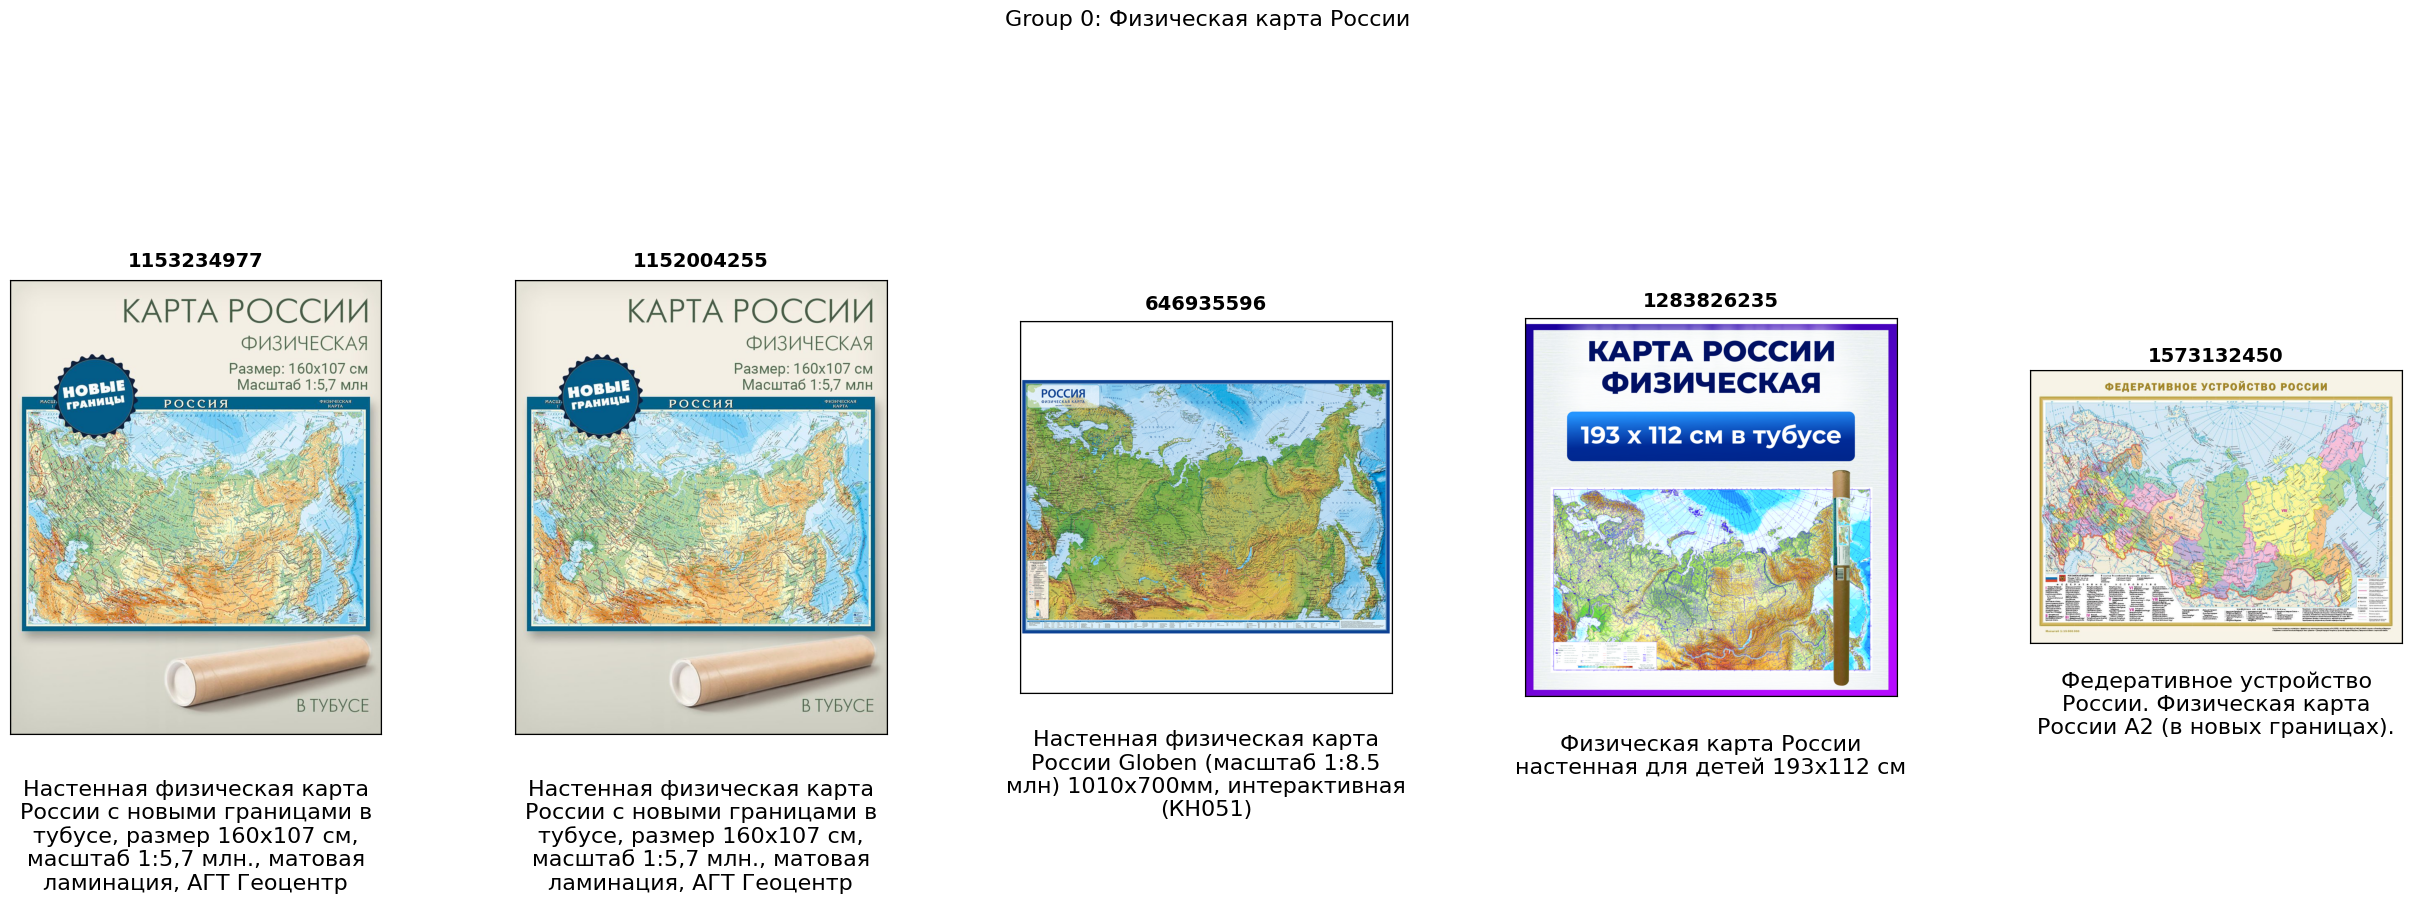

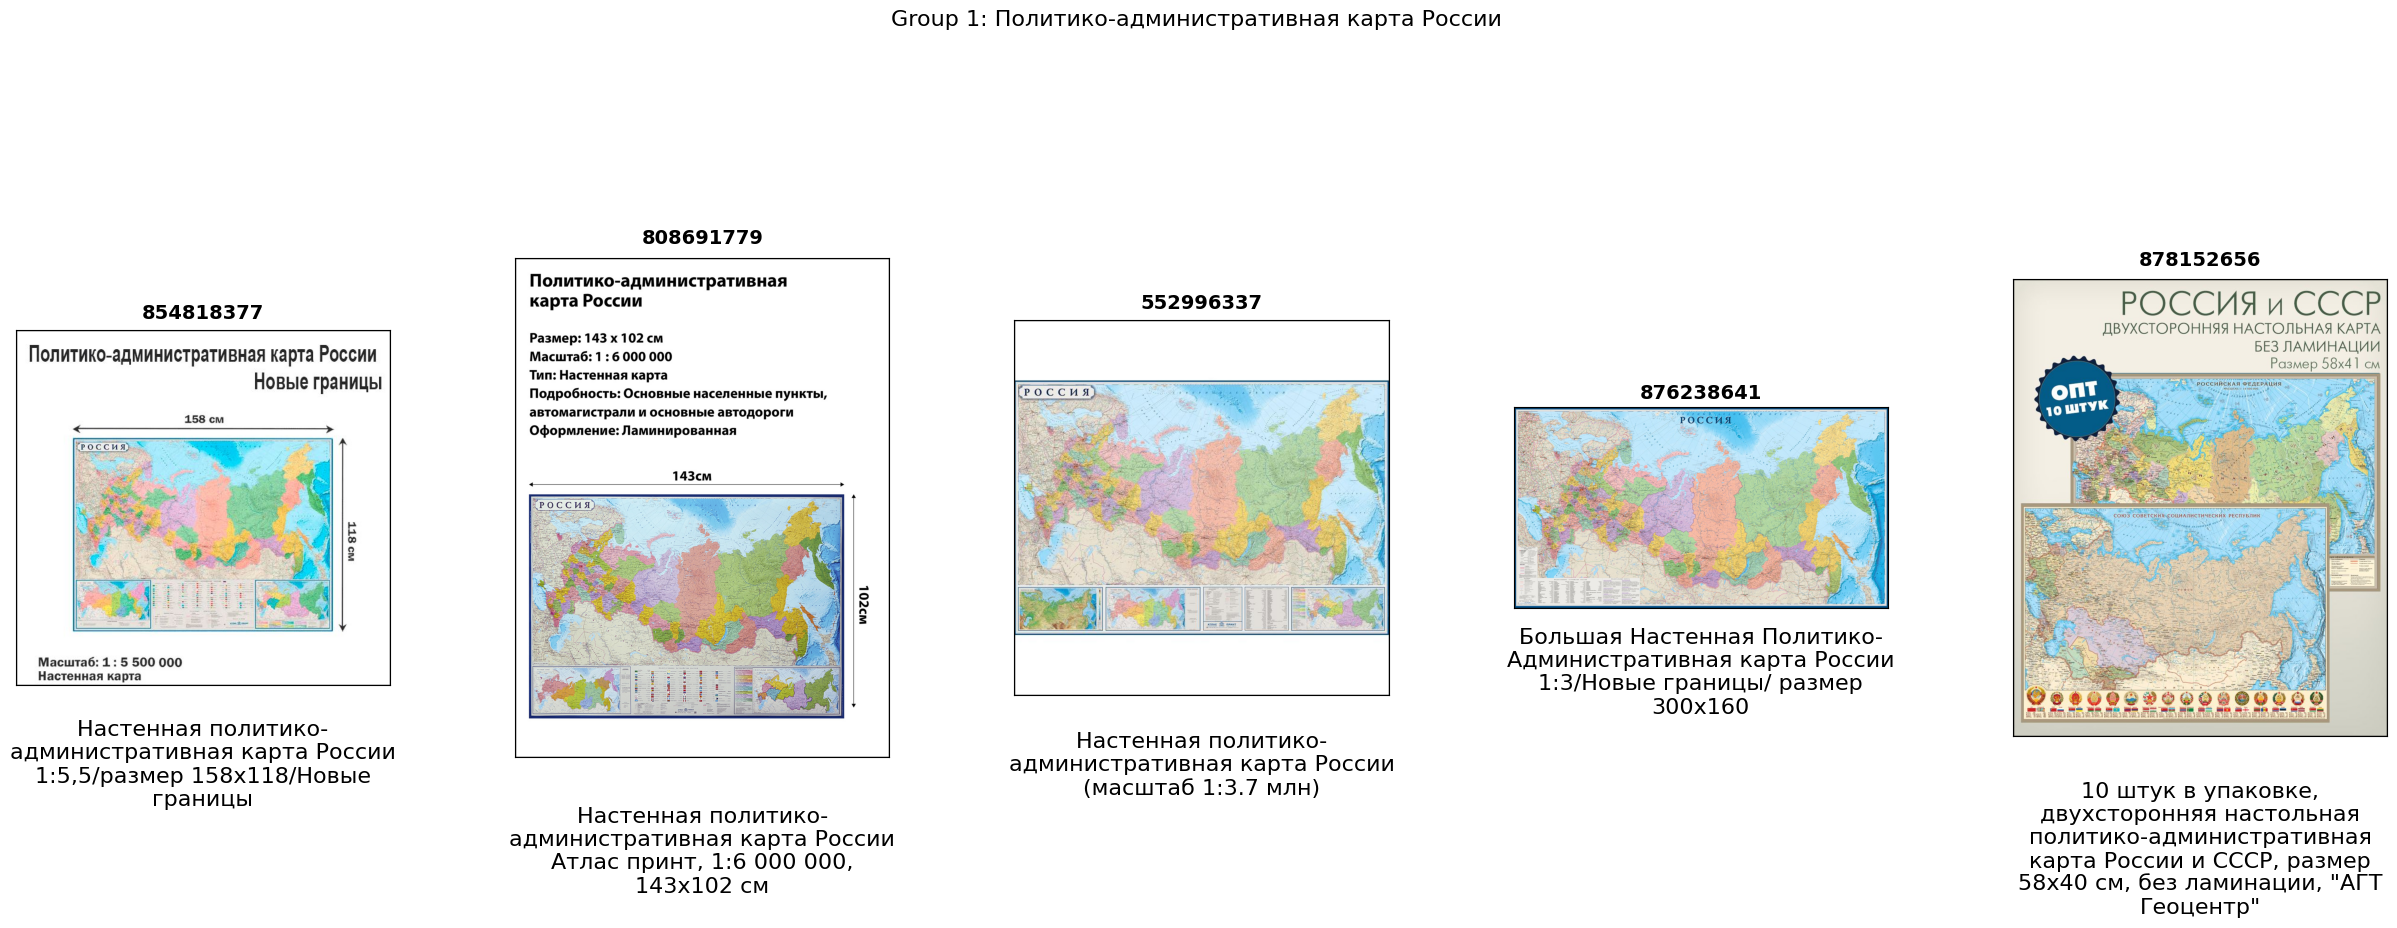

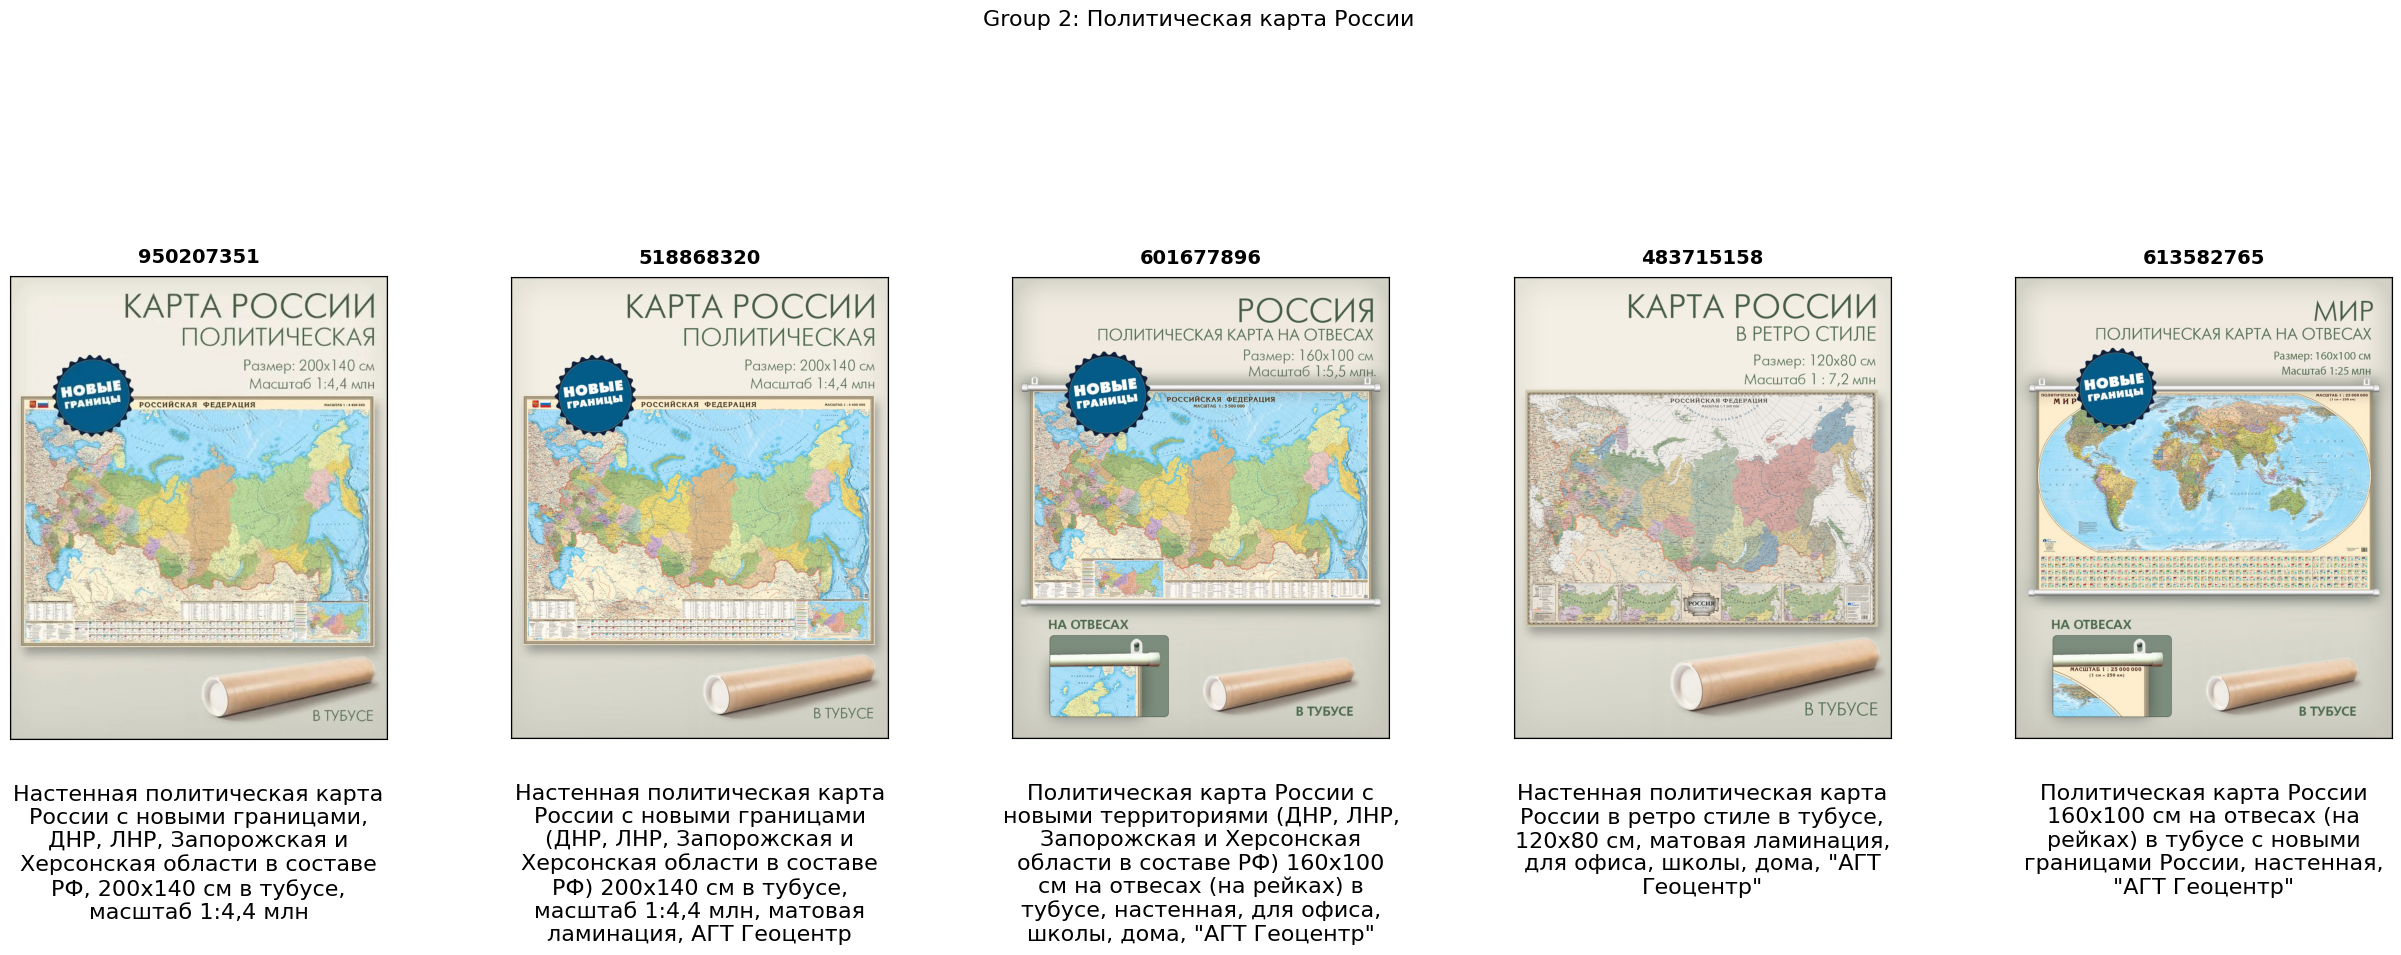

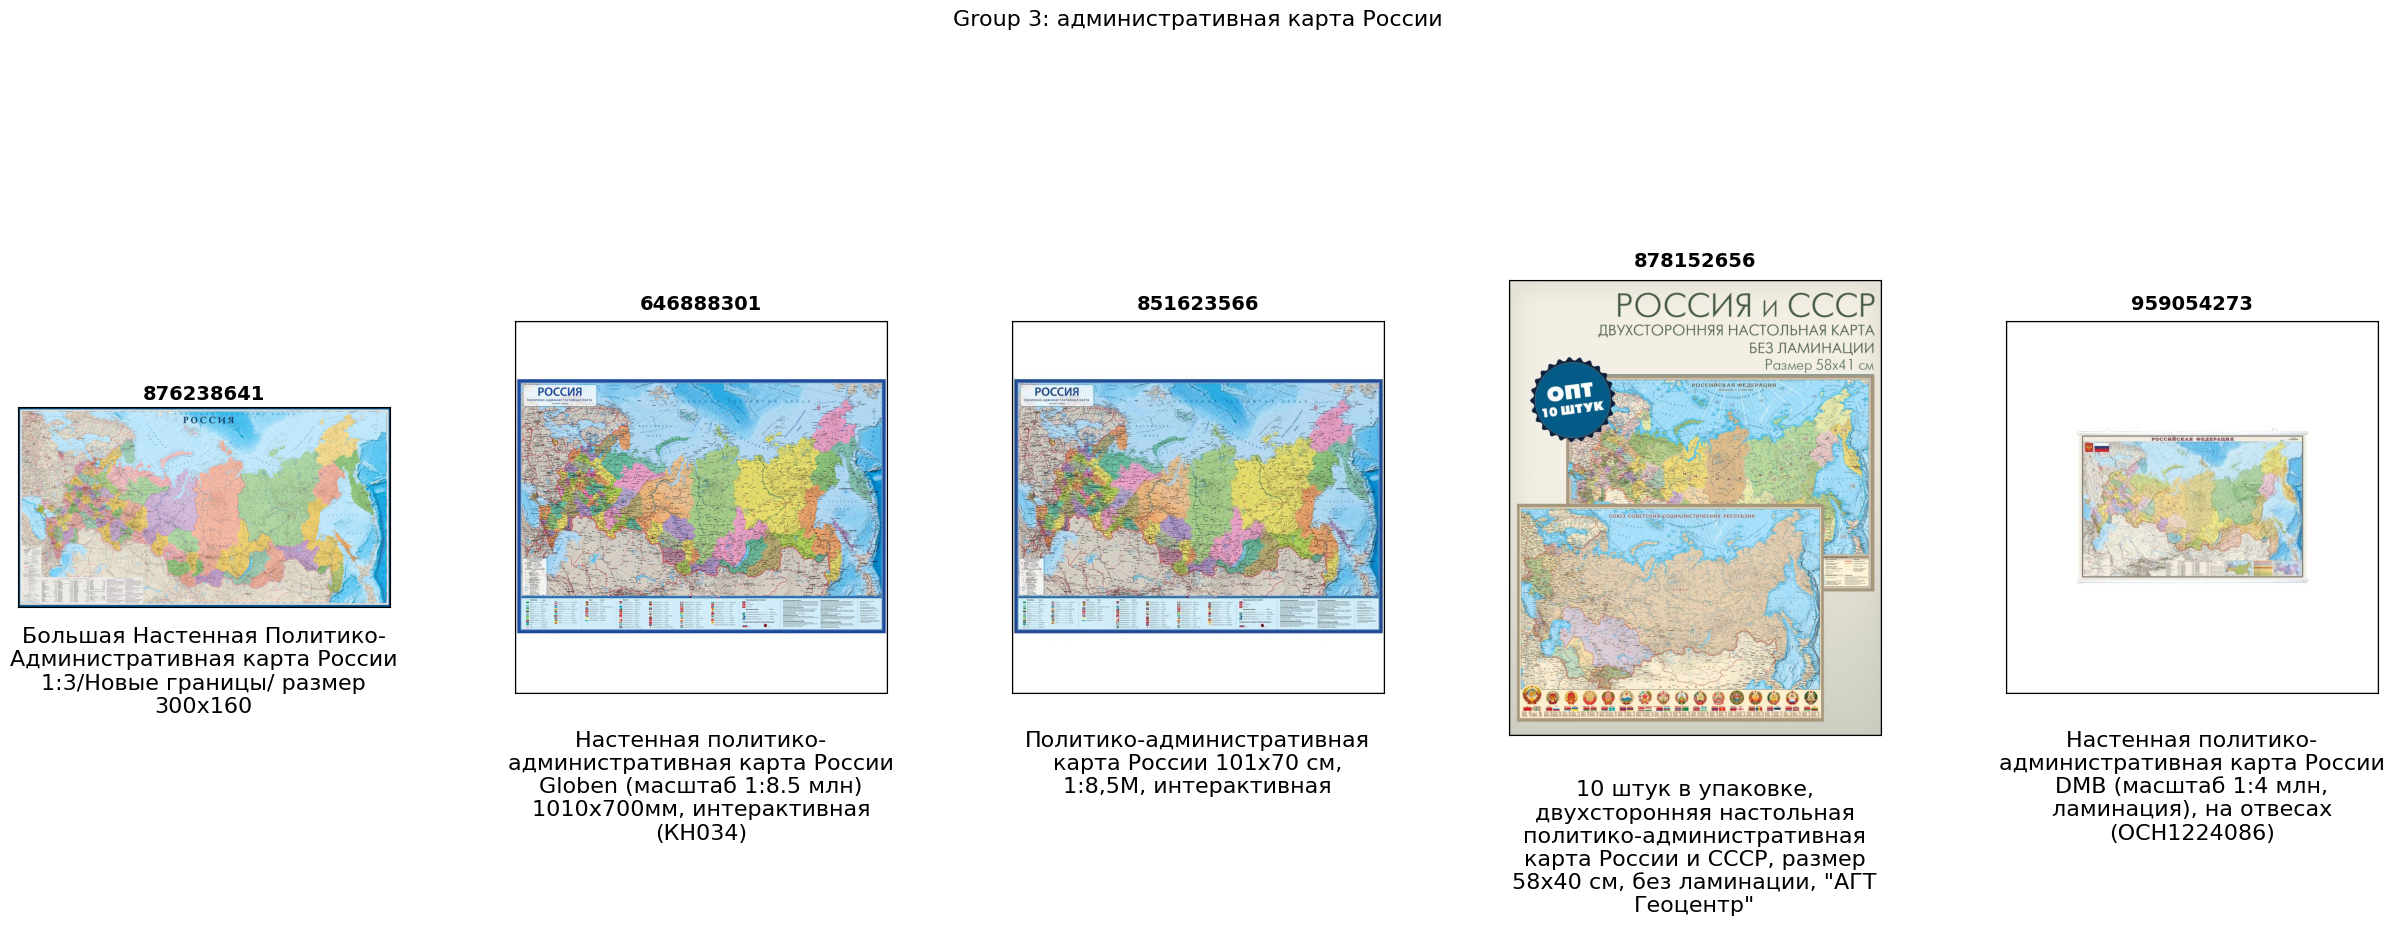

In [13]:
from pathlib import Path
# IMAGES_DIR = Path('../competitors-xgb/data/images_OZ_geo_5500')

plot_samples_grid_by_group(
    sample_df,
    # merged_df,
    images_dir=IMAGES_DIR,
    image_col='image_name',   # or whatever your column is
    name_col='name',          # column containing the product name
    ncols=5,
    figsize=(15, 10)
)


## Prompts

In [14]:
prompts = {}

def add_prompt(collection_name, prompt_name, prompt, kwargs={}):
    if collection_name not in prompts.keys():
        prompts[collection_name] = {}

    prompts[collection_name][prompt_name] = {}
    prompts[collection_name][prompt_name]['name'] = prompt_name
    prompts[collection_name][prompt_name]['kwargs'] = kwargs
    prompts[collection_name][prompt_name]['template'] = prompt

## Semi-supervised attribute definition

In [15]:
# Brand list

brand_list = """
 - не указано
 - 8&8
 - ANYSMART
 - ARIA
 - Arthata - Карта
 - Arthata - Карты
 - ArtulLife
 - BalticAir
 - Brauberg
 - CENTR MAG ЦЕНТРАЛЬНЫЙ ИНТЕРНЕТ-МАГАЗИН
 - DMB
 - Edustrong
 - GLOBUSOFF
 - GORAVODA
 - GSPrint
 - Gift Development
 - Globen
 - Jmar
 - Josef Otten
 - LISIK.
 - Luxury Gift
 - Mazari
 - Musson
 - My wood map
 - NONAME
 - No Name SHOP
 - Nobikum
 - SK-Poster
 - Solartek
 - Warhammer 40K
 - Wondershop
 - АГТ Геоцентр
 - АСТ
 - Административная карта
 - Арт-студия Ариша. Мастерская багета
 - АртБорд
 - Атлас Принт
 - Атлас-карта
 - Бумажная продукция
 - Бумбаса
 - Властелин колец
 - ГеоДом
 - Географическая карта
 - Гравировка02.рф
 - ДИЭМБИ
 - Дик
 - ИД ПОРТ-АПРЕЛЬ
 - ИКС
 - Играматика
 - Издательство КАРО
 - Издательство Экспресс
 - Институт навигационных технологий
 - Канцелярия
 - Карта ТД
 - Картография
 - Карты мира
 - Лира2puzzle
 - Маленький гений
 - Местные
 - Мини Тайп
 - Найти
 - Неважно
 - ОТРОК
 - Омская картографическая фабрика
 - Открытая планета
 - ПОЛИГОН
 - Пилот
 - ПолиЦентр
 - Правила Успеха
 - Просвещение
 - ПРОкарта
 - РУЗ Ко
 - Роскадастр
 - Роскартография
 - РостАГП
 - Сима-Ленд
 - Сити Бланк
 - Фабрика настенных карт
 - ЭкоАрт
 - Эксмо
 - Юнландия
"""

In [16]:
# Prompt 0: default

prompt_name='0_default'

prompt = """
Your task is to correct attribute definitions using product descriptions in domain {domain_name}.

Firstly, you need to extend the attributes definitions.
Identify all attributes which are important for product matching along with their possible values.
Then add any missing attributes to the attributes definitions.

Secondly, you need to extend the lists of possible values in the attributes definitions.
For each categorical attribute in the list identify all possible values and add them to the corresponding attribute definition.
For each numerical attribute in the list identify different ways of writing the number and add more examples to the corresponding attribute definition.

Output extended attributes definitions in the exact same format as input. Do not output any header.

Attributes definitions:
{attributes_definitions}

Products descriptions:
{products_descriptions}
"""

domain_name = "Карты георгафические"

attributes_definitions = f"""
1. Тип отображения / representation [categorical]
    - физическая
    - политическая
    - административная (административно-политическая)
    - природные зоны (с животными и растениями)
2. Тип размещения / placement [categorical]
    - настенная
    - складная
3. Область покрытия / coverage [categorical]
    - мир
    - мир (полушария)
    - страна
    - регион
    - округ
    - город (напр. Москва)
    - город и область (напр. Москва и Московская область)
4. Упаковка / packaging [categorical]
    - без упаковки
    - тубус
5. Крепление / mount [categorical]
    - не указано (скотч/кнопки)
    - на отвесах (рейках)
    - подвес (европодвес)
6. Назначение / usecase [categorical]
    - офис/школа/дом
    - для детей
7. Размер - ширина, высота / (width, height) [numerical]
    - в см: (напр. 143x102 см) -> width = 143, height = 102
    - в м: (напр. 1,43x1,02 м) -> width = 143, height = 102
8. Размер - формат / size_format [categorical]
    - A0
    - A1
    - A2
    - A3
9. Стиль / style [categorical]
    - ретро
    - историческая (старинная)
    - автомобильная
10. Бренд / brand [categorical]
{brand_list}
11. Масштаб / scale [numerical]
    - 1:22000000 -> scale = 22
    - 1:22 млн -> scale = 22
12. Границы / borders [categorical]
    - с новыми границами
"""

add_prompt(
    collection_name='attr_def_corrected',
    prompt_name=prompt_name,
    prompt=prompt,
    kwargs={
        "domain_name": domain_name,
        "attributes_definitions": attributes_definitions,
        "brand_list": brand_list
    }
)

In [17]:
# Prompt 1.0: fix numerical attributes handling
# - split width and height
# - remove adding examples for numerical attributes
# - add unit annotation for numerical attributes

prompt_name = '1.0_fix_num_attr'

prompt = """
Your task is to correct attribute definitions using product descriptions in domain {domain_name}.

Firstly, you need to extend the attributes definitions.
Identify all attributes which are important for product matching along with their possible values.
Then add any missing attributes to the attributes definitions.

Secondly, you need to extend the lists of possible values in the attributes definitions.
For each categorical attribute in the list identify all possible values and add them to the corresponding attribute definition.
For each numerical attribute in the list make sure to specify units of measurement and exactly one example of extracting correct value from the text.

Output extended attributes definitions in the exact same format as input.
Do not output any header.

Attributes definitions:
{attributes_definitions}

Products descriptions:
{products_descriptions}
"""

domain_name = "Карты георгафические"

attributes_definitions = f"""
1. Тип отображения / representation [categorical]
    - физическая
    - политическая
    - административная (административно-политическая)
    - природные зоны (с животными и растениями)
2. Тип размещения / placement [categorical]
    - настенная
    - складная
3. Область покрытия / coverage [categorical]
    - мир
    - мир (полушария)
    - страна
    - регион
    - округ
    - город (напр. Москва)
    - город и область (напр. Москва и Московская область)
4. Упаковка - тубус / is_tube_packaging [bool]
5. Крепление / mount [categorical]
    - не указано (скотч/кнопки)
    - на отвесах (рейках)
    - подвес (европодвес)
6. Назначение / usecase [categorical]
    - офис/школа/дом
    - для детей
7. Ширина  / width [numerical]
* Units: centimeters
    - 143x102 см -> 143
8. Высота / height [numerical]
* Units: centimeters
    - 143x102 см -> 102
9. Размер - формат / size_format [categorical]
    - A0
    - A1
    - A2
    - A3
10. Стиль / style [categorical]
    - не указано (без стиля)
    - ретро
    - историческая (старинная)
    - автомобильная
11. Бренд / brand [categorical]
{brand_list}
12. Масштаб / scale [numerical]
* Units: millions of km
    - 1:22000000 -> 22
13. С новыми границами / is_new_borders [bool]
"""

add_prompt(
    collection_name='attr_def_corrected',
    prompt_name=prompt_name,
    prompt=prompt,
    kwargs={
        "domain_name": domain_name,
        "attributes_definitions": attributes_definitions,
        "brand_list": brand_list
    }
)

In [18]:
# Prompt 2: enumerate categorical attributes
# - enumerate categorical attributes
# - add more representation types
# - adjust list formatting for categorical attributes

prompt_name = '2_enumerate_categorical'

prompt = """
Your task is to correct attribute definitions using product descriptions in domain {domain_name}.

Firstly, you need to extend the attributes definitions.
Identify all attributes which are important for product matching along with their possible values.
Then add any missing attributes to the attributes definitions.

Secondly, you need to extend the lists of possible values in the attributes definitions.
For each categorical attribute in the list identify all possible values and add them to the corresponding attribute definition.
For each numerical attribute in the list make sure to specify units of measurement and exactly one example of extracting correct value from the text.

For each categorical attribute make sure to enumerate all possible values (using numbers starting from 0) instead of listing them with dashes such as instead of:
- value 1
- value 2
to use:
0. value 1
1. value 2
For boolean attributes do not list values.
For numerical attributes list measurement units (starting with "* Units:") and list unique examples of extracting values from the text.

Output extended attributes definitions in the exact same format as input.
Do not output any header.

Attributes definitions:
{attributes_definitions}

Products descriptions:
{products_descriptions}
"""

domain_name = "Карты георгафические"

attributes_definitions = f"""
1. Тип отображения / representation [categorical]
    0. физическая
    1. политическая
    2. административная (административно-политическая)
    3. природные зоны (с животными и растениями)
    4. скретч-карта
    5. карта звездного неба
2. Тип размещения / placement [categorical]
    - настенная
    - складная
3. Область покрытия / coverage [categorical]
    - мир
    - мир (полушария)
    - страна
    - регион
    - округ
    - город (напр. Москва)
    - город и область (напр. Москва и Московская область)
4. Упаковка - тубус / is_tube_packaging [bool]
5. Крепление / mount [categorical]
    - не указано (скотч/кнопки)
    - на отвесах (рейках)
    - подвес (европодвес)
6. Назначение / usecase [categorical]
    - офис/школа/дом
    - для детей
7. Ширина  / width [numerical]
* Units: centimeters
    - 143x102 см -> 143
8. Высота / height [numerical]
* Units: centimeters
    - 143x102 см -> 102
9. Размер - формат / size_format [categorical]
    - A0
    - A1
    - A2
    - A3
10. Стиль / style [categorical]
    - не указано (без стиля)
    - ретро
    - историческая (старинная)
    - автомобильная
11. Бренд / brand [categorical]
{brand_list}
12. Масштаб / scale [numerical]
* Units: millions of km
    - 1:22000000 -> 22
13. С новыми границами / is_new_borders [bool]
"""

add_prompt(
    collection_name='attr_def_corrected',
    prompt_name=prompt_name,
    prompt=prompt,
    kwargs={
        "domain_name": domain_name,
        "attributes_definitions": attributes_definitions,
        "brand_list": brand_list
    }
)

# Main

## Set sys prompt

In [19]:
# SET SYSTEM PROMPT

# chosen_system_template = """
# You are helping to label a dataset of products for entity matching task in e-commerce.
# Answer user requests in valid CSV format with a header.
# Do NOT use triple quotes (```) before or after outputting CSV.
# Do NOT write '```csv' before outputting CSV.
# """

chosen_system_template = """
You are helping to label a dataset of products for entity matching task in e-commerce.
Output strictly in requested format, do not output any additional comments.
"""

explain_system_template = """
You are helping to label a dataset of product pairs.
"""

# Choose prompt collection

In [20]:
print("Available prompt collections:\n")
for p in list(prompts.keys()):
    print(f"'{p}'")


Available prompt collections:

'attr_def_corrected'


In [21]:
chosen_prompt_collection = 'attr_def_corrected'

## Chose user prompt

In [22]:
print(f"Available prompt collections for {chosen_prompt_collection}:\n")
for p in list(prompts[chosen_prompt_collection].keys()):
    print(f"'{p}'")


Available prompt collections for attr_def_corrected:

'0_default'
'1.0_fix_num_attr'
'2_enumerate_categorical'


In [23]:
# CHOOSE PROMPT & INPUT DATA

# Choose a prompt
chosen_prompt = prompts[chosen_prompt_collection][
    # '0_default'
    # '1.0_fix_num_attr'
    '2_enumerate_categorical'
]

# Choose a subset (or the full dataset)
# chosen_subset_df = sample_df
chosen_subset_df = full_df

# Choose description column to use as input
chosen_description_col = 'name_and_description'
# chosen_description_col = 'name'

chosen_products_descriptions = get_input(chosen_subset_df, chosen_description_col)

Input table to .csv:


sku      seller                               name_and_description
0  1871769771  ИНТЕРТРЕЙД  Карты МИРА и РОССИИ настенные политические,160...

Input symbols count in .csv: 4507752


In [24]:
# RECORD RENDERED PROMPT TO SAVE LATER & COMPUTE COST
rendered_template = chosen_prompt['template'].format(
    products_descriptions=chosen_products_descriptions,
    **chosen_prompt['kwargs']
)
pd.Series(rendered_template).to_clipboard(header=False)

rendered_template_without_data = chosen_prompt['template'].format(
    products_descriptions='',
    **chosen_prompt['kwargs']
)

In [25]:
# CHOOSE MODEL CONFIG

from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate, ChatPromptTemplate
from langchain.chains import LLMChain
from pathlib import Path
import pandas as pd

config = dict(
    # model_name='openai/o4-mini',
    model_name='openai/gpt-4.1',
    # model_name="openai/gpt-4.1-mini",
    # model_name="openai/gpt-4.1-nano",
    # model_name='openai/gpt-4o-2024-11-20', # bad .csv output
    # model_name='openai/gpt-4o-2024-11-20-online', # bad .csv output
    # model_name="deepseek/deepseek-chat",
    # model_name="google/gemma-3-27b-it",

    # temperature= 0,
    # temperature= 0.1,
    # temperature= 0.3,
    # temperature= 0.7,
    temperature= 0.9,
    # temperature=1.0,

    # top_p= 0.2,
    # top_p= 0.5,
    # top_p= 0.7,
    # top_p= 0.85,
    top_p= 0.95,
    # top_p= 1.0,
    # top_k= 100,

    # reasoning_effort='low'
)

In [ ]:
PRICE_PER_1000_TOKENS = {
    'openai/gpt-4.1': 0.28,
    'openai/o4-mini': 0.28,
    'openai/gpt-4.1-mini': 0.06,
    'openai/gpt-4.1-nano': 0.015,
    'openai/gpt-4o-2024-11-20': 0.3,
    'openai/gpt-4o-2024-11-20-online': 0.3
}

total_output_symbols = (
    10 # symbols per column
    *  # number of cols per line
    * len(chosen_subset_df)
)

total_input_symbols = len(rendered_template)

total_symbols = total_input_symbols + total_output_symbols
total_input_cost = total_input_symbols / 1000 * PRICE_PER_1000_TOKENS[config['model_name']]
total_output_cost = total_output_symbols / 1000 * PRICE_PER_1000_TOKENS[config['model_name']]
total_cost = total_input_cost + total_output_cost

print(f"Total cost: {total_cost:.2f} RUB")
print(f"Input cost: {total_input_cost:.2f} RUB")
print(f"Output cost: {total_output_cost:.2f} RUB")


Total cost: 1356.65 RUB
Input cost: 1263.21 RUB
Output cost: 93.44 RUB


In [373]:
explain_kwargs = dict(
    sku_pairs_to_explain = [
        [642283345, 85668594],
        [564441860, 958897351]
    ]
)

explain_prompt = """
Explain your reasoning for following pairs of sku:
{sku_pairs_to_explain}
"""

In [374]:
# ⬛️ Single-cell, ready-to-run version — modern LangChain pattern
# --------------------------------------------------------------
# Uses:
#   • runnable pipeline  (prompt | chat | StrOutputParser)
#   • explicit tool_choice="none"
#   • streaming=False so text is captured automatically
#   • verbose=True for end-to-end logging
#   • memory attached only in EXPLAIN mode
#
# Expects the following variables to be defined somewhere above:
#   OPENAI_API_KEY                – your key (str)
#   CHOSEN_MODE                   – "INFERENCE"  or  "EXPLAIN"
#   chosen_system_template        – str
#   chosen_prompt                 – dict  {"template": str, "kwargs": {...}}
#   chosen_products_descriptions     – str
#   explain_system_template       – str  (only for EXPLAIN)
#   explain_prompt                – str  (only for EXPLAIN)
#   explain_kwargs                – dict (optional, only for EXPLAIN)

CHOSEN_MODE = "INFERENCE"
# CHOSEN_MODE = "EXPLAIN"

from datetime import datetime
from langchain_openai import ChatOpenAI
from langchain.prompts import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.memory import ConversationBufferMemory
from langchain_core.output_parsers import StrOutputParser

# ───────────────────────── 1. Build the ChatOpenAI instance ─────────────────────────
chat = ChatOpenAI(
    openai_api_key=OPENAI_API_KEY,
    openai_api_base="https://api.vsegpt.ru/v1",       # swap for api.openai.com if needed
    model=config['model_name'],                              # or whatever slug your proxy wants
    streaming=False,                                  # 🔒 capture full text
    verbose=True,                                     # 🔍 prints prompt + response metadata
    model_kwargs={"tool_choice": "none"},             # 📴 disable tool calls
)

# ───────────────────────── 2. Common helpers ─────────────────────────
def _make_prompt(system_tpl: str, human_tpl: str):
    """Return a ChatPromptTemplate that expects the same variables used in `human_tpl`."""
    return ChatPromptTemplate.from_messages([
        SystemMessagePromptTemplate.from_template(system_tpl),
        HumanMessagePromptTemplate.from_template(human_tpl),
    ])

def _timestamp() -> str:
    return datetime.now().strftime("%y-%m-%d_%H-%M-%S")

# ───────────────────────── 3. Mode-specific setup ─────────────────────────
if CHOSEN_MODE == "INFERENCE":
    # Stateless: no memory
    prompt      = _make_prompt(
        chosen_system_template,
        chosen_prompt["template"]
    )
    variables   = {
        "products_descriptions": chosen_products_descriptions,
        **chosen_prompt.get("kwargs", {}),
    }
    runnable    = prompt | chat | StrOutputParser()

elif CHOSEN_MODE == "EXPLAIN":
    # Stateful: attach memory and include history in the prompt
    memory      = globals().get("memory", ConversationBufferMemory())
    human_tpl   = f"""Previous conversation:
{{history}}

{explain_prompt}"""
    prompt      = _make_prompt(explain_system_template, human_tpl)
    variables   = {
        "history": memory.load_memory_variables({})["history"],
        "products_descriptions": chosen_products_descriptions,
        **globals().get("explain_kwargs", {}),
    }
    runnable    = prompt.with_memory(memory) | chat | StrOutputParser()

else:
    raise ValueError(f"Unknown CHOSEN_MODE: {CHOSEN_MODE}")

response_timestamp = _timestamp()
response_text = runnable.invoke(variables)
print(f"[{CHOSEN_MODE}] { response_timestamp }\n{response_text}")

[INFERENCE] 25-05-05_17-34-39
1. Тип отображения / representation [categorical]
    0. физическая
    1. политическая
    2. административная (административно-политическая)
    3. природные зоны (с животными и растениями)
    4. скретч-карта
    5. карта звездного неба
    6. политико-административная
    7. интерактивная
    8. историческая
    9. двусторонняя (комбинированная)
2. Тип размещения / placement [categorical]
    0. настенная
    1. складная
    2. настольная
3. Область покрытия / coverage [categorical]
    0. мир
    1. мир (полушария)
    2. страна
    3. регион
    4. округ
    5. город (например: Москва)
    6. город и область (например: Москва и Московская область)
    7. Россия
    8. Россия и страны СНГ / СССР
    9. федеральный округ РФ (например: Центральный)
    10. субъекты РФ
4. Упаковка - тубус / is_tube_packaging [bool]
5. Крепление / mount [categorical]
    0. не указано (скотч/кнопки)
    1. на отвесах (рейках)
    2. подвес (европодвес)
    3. без креплени

In [ ]:
# save response and rendered template

responses_filename = "_".join(
    [response_timestamp] +
    [f"{k}={Path(v).name if k == 'model_name' else v}" for k, v in config.items()]
)

if 'group_id' in chosen_subset_df:
    responses_filename += (
        f'_seed={SEED}'
        f'_samples-per-pattern={N_SAMPLES_PER_PATTERN}'
        f'_pattern-set-id={PATTERN_SET_ID}'
        '.txt'
    )

prompt_dir = (
    Path('datasets') / Path('OZ_geo_5500') /
    Path('multi-stage_stage-0') / Path(chosen_prompt_collection) /
    # Path('prompts') / chosen_prompt['name']
    chosen_prompt['name']
)

prompt_responses_dir = prompt_dir / 'responses'
prompt_responses_dir.mkdir(parents=True, exist_ok=True)

print(f'Saving rendered templates and response to folder:\n{prompt_dir}')
(prompt_dir / 'rendered_template.txt').write_text(
    rendered_template, encoding="utf-8"
)

(prompt_dir / 'rendered_template_without_data.txt').write_text(
    rendered_template_without_data, encoding="utf-8"
)

print(f'\nSaving response with filename:\n{responses_filename}')
(prompt_responses_dir / responses_filename).write_text(
    response_text, encoding="utf-8"
)

print()

Saving rendered templates and response to folder:
datasets/OZ_geo_5500/multi-stage_stage-0/attr_def_corrected/2_enumerate_categorical

Saving response with filename:
25-05-05_17-34-39_model_name=gpt-4.1_temperature=0.9_top_p=0.95_seed=24_samples-per-pattern=5_pattern-set-id=1.txt



In [379]:
# pd.Series(rendered_template).to_clipboard(header=False)

# (optional) View results directly from a file

In [380]:
import os

prompt_collection_names = list(sorted(os.listdir(Path('datasets/OZ_geo_5500/multi-stage_stage-0'))))
print("Prompt collections:\n")

for i, prompt_collection_name in enumerate(prompt_collection_names):
    print(f'({i})', prompt_collection_name)

Prompt collections:

(0) attr_def_corrected


In [381]:
prompt_collection_idx = 0

################################################################

prompt_collection_name = prompt_collection_names[
    prompt_collection_idx
]

collection_prefix = Path('datasets/OZ_geo_5500/multi-stage_stage-0') / prompt_collection_name
prompt_names = list(sorted(os.listdir(collection_prefix)))

print(f"Prompts for prompt collection '{prompt_collection_name}':\n")
for i, res in enumerate(prompt_names):
    print(f'({i})', res)

Prompts for prompt collection 'attr_def_corrected':

(0) 0_default
(1) 1.0_fix_num_attr
(2) 2_enumerate_categorical


In [382]:
import glob

prompt_idx = 2

################################################################

prompt_name = prompt_names[
    prompt_idx
]

prompt_prefix = collection_prefix / prompt_name / 'responses'
responses_names = list(sorted(os.listdir(prompt_prefix)))
# responses_names = glob.glob(f'{prompt_prefix}/*.txt')

print(f"Responses for prompt '{prompt_name}':\n")
for i, res in enumerate(responses_names):
    print(f'({i})', res)

Responses for prompt '2_enumerate_categorical':

(0) 25-05-05_17-34-39_model_name=gpt-4.1_temperature=0.9_top_p=0.95_seed=24_samples-per-pattern=5_pattern-set-id=1.txt


In [383]:
# Choose response to view

chosen_result_idx = -1

##############################################

chosen_result_name = responses_names[chosen_result_idx]
file_path = prompt_prefix / chosen_result_name

try:
    with open(file_path, 'r') as file:
        result_txt = file.read()
except FileNotFoundError:
    print(f"The file at {file_path} was not found.")
except IOError as e:
    print(f"An error occurred while reading the file: {e}")

print(result_txt)

1. Тип отображения / representation [categorical]
    0. физическая
    1. политическая
    2. административная (административно-политическая)
    3. природные зоны (с животными и растениями)
    4. скретч-карта
    5. карта звездного неба
    6. политико-административная
    7. интерактивная
    8. историческая
    9. двусторонняя (комбинированная)
2. Тип размещения / placement [categorical]
    0. настенная
    1. складная
    2. настольная
3. Область покрытия / coverage [categorical]
    0. мир
    1. мир (полушария)
    2. страна
    3. регион
    4. округ
    5. город (например: Москва)
    6. город и область (например: Москва и Московская область)
    7. Россия
    8. Россия и страны СНГ / СССР
    9. федеральный округ РФ (например: Центральный)
    10. субъекты РФ
4. Упаковка - тубус / is_tube_packaging [bool]
5. Крепление / mount [categorical]
    0. не указано (скотч/кнопки)
    1. на отвесах (рейках)
    2. подвес (европодвес)
    3. без крепления (или упакована в пакет)
6. Н